<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/Copy_of_Loan_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA






In [5]:
data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

# New Section

***Data exploration***

*View the first five rows*

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


*View the last five rows*

In [7]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


*Explore the shape of the data to know the number of rowa and columns available in the dataset*

In [8]:
data.shape

(614, 13)

In [9]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 614
Number of Columns 13


In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Exploratory Data Analysis**

*Comparing parameters visually*

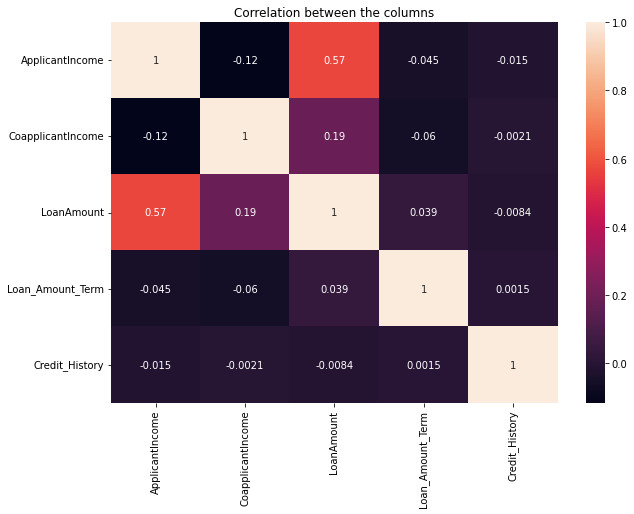

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()



*Explore information about the dataset such as the total rows and columns data type of each column and the memory space required.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


*explore data to see if it contains empty cells*

In [13]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

*Show missing values as a percentage of the data*

In [14]:
data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

*Adjustment of data by droping columns where missing values are less than 5%.* *These are the Loan_ID,Gender, Dependents,LoanAmount,and Loan_Amount_Term columns.*

In [15]:
data = data.drop('Loan_ID', axis=1)

In [16]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [17]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [18]:
data = data.dropna(subset=columns)

In [19]:
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [20]:
data['Self_Employed'].mode()[0]

'No'

In [21]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

1       No
2      Yes
3       No
4       No
5      Yes
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 553, dtype: object

In [22]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [23]:
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [24]:
  data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [25]:
data.isnull().sum()*100 / len(data)


Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [26]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
data['Credit_History'].unique()

array([1., 0.])

*Processing categorical columns.This is done because machine learning algorithms understand only numnberical values*

In [28]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
474,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y
577,Male,No,0,Graduate,No,3229,2739.0,110.0,360.0,1.0,Urban,Y
170,Male,Yes,0,Not Graduate,No,1820,1769.0,95.0,360.0,1.0,Rural,Y
276,Male,Yes,0,Graduate,No,3993,3274.0,207.0,360.0,1.0,Semiurban,Y
351,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N


In [29]:
data['Dependents'] = data['Dependents'].replace(to_replace="3+",value='4')

In [30]:
data.sample(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
384,Male,Yes,2,Graduate,No,4566,0.000000,100.0,360.0,1.0,Urban,N
115,Male,Yes,1,Graduate,No,14583,0.000000,185.0,180.0,1.0,Rural,Y
481,Male,Yes,4,Not Graduate,No,3095,0.000000,113.0,360.0,1.0,Rural,Y
321,Male,Yes,4,Graduate,No,4342,189.000000,124.0,360.0,1.0,Semiurban,Y
67,Male,Yes,1,Graduate,No,10750,0.000000,312.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
428,Male,Yes,0,Graduate,No,2920,16.120001,87.0,360.0,1.0,Rural,Y
244,Male,Yes,0,Not Graduate,No,3406,4417.000000,123.0,360.0,1.0,Semiurban,Y
15,Male,No,0,Graduate,No,4950,0.000000,125.0,360.0,1.0,Urban,Y
370,Female,No,0,Graduate,Yes,15759,0.000000,55.0,360.0,1.0,Semiurban,Y


In [31]:
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

*Mapping. This is a process first giving values to categories before converting them to integers*

*First check the values under the gender category*

In [32]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [33]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [34]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


*Save the features Matix In X And the output Or target In the vector Y*

In [35]:
X = data.drop('Loan_Status',axis=1)

In [36]:
y = data['Loan_Status']

In [37]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64

In [38]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64

In [39]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


*Scalling the features.*

*This enable us to put all the features in the same. This essential for machine learning algorithms that calculates distance between data. If not scalled features with higher value will dominate when calculating distances.* The ML algorithms that require feature scalling are K-nearst table, neuronetworks,support vector machine, linear regression and logistic regression. The algorithms that do not require features scalling are mostly non-linear machine learning algorithms such as decision tree, random forest, Arboost, nerobase etc. Any algorithm that is not distance based is not affected by scalling.*

In [40]:
cols =['ApplicantIncome','CoapplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [41]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [42]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


*Split Dataset into training and testing set.* 
*This will assist us in evaluation the performance of our machine learning algorithms.*

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

*for model evaluation we are looking for the best model using this dataset meaning that we have to look for the accuracy for different machine learning models and the average cross validation score.*
* We then create a functiion to perform the task in such a way that we will save time in avoiding to rewrite the same code over and over again.*

*The model will then be trained on Xtrain and ytrain whilst prediction will be performed with the use of Xtest and ytest.*

*Cross validation is used to find the base model. This is because crossvalidation renders it possible to compare different machine learning algorithms and obtain an understanding of how efficient or effective they will perform in practice*

*The dataset has been split into two parts, 80% for training and 20% for testing* explain how crossvalidation works.

In [44]:
model_df={}
def model_val(model,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")

  score = cross_val_score(model,X,y,cv=5)
  print(f"{model} Avg cross val score is {np.mean(score)}")
  model_df[model]=round(np.mean(score)*100,2)

  



***Using different machine learning algorithms with the model***

**Logistic Regression**

In [45]:
model_df

{}

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model_val(model,X,y)



LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


**Support Vector Classifier (SVC)**

In [47]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


**Decision Tree Classifier**

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)


DecisionTreeClassifier() accuracy is 0.7747747747747747
DecisionTreeClassifier() Avg cross val score is 0.717936117936118


**Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_val(model,X,y)


RandomForestClassifier() accuracy is 0.7567567567567568
RandomForestClassifier() Avg cross val score is 0.7866830466830468


**Gradient Boosting Classifier**

In [50]:

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model_val(model,X,y)



GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Avg cross val score is 0.7685503685503685


*The model has been constructed using default parameter turning.To ensure accuracry there is a need for hyperparameter turning.*

****Hyperparameter Tuning****

*There are two types of parameters in machine learning which are model parameters and hyperparameters. The model parameters are those of the data meaning that the model will learn these from the data.Hyper parameters are model parameters that must be tuned to enable the model to obtain optimal performance. Machine learning models can have many parameters which are then fine tuned to derive optimal results. The two best cvs for hpyprarameter tuning are Gridsearchcv and randomisedsearchcv.

In [51]:
from sklearn.model_selection import RandomizedSearchCV

**Logistic Regressiion**

In [52]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [53]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)


In [54]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [55]:
rs_log_reg.best_score_

0.8047829647829647

In [56]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

**Support Vector Classifier (SVC)**

In [57]:
svc_grid = {'C':[0.25,0.5,0.75,1],"kernel":["linear"]}

In [58]:
rs_svc=RandomizedSearchCV(svm.SVC(),param_distributions=svc_grid,cv=5,n_iter=20,verbose=True)

In [59]:
rs_svc.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [60]:
rs_svc.best_score_

0.8066011466011467

In [61]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

**Decision Tree Classifier**

**Random Forest Classifier**

In [62]:
RandomForestClassifier()

RandomForestClassifier()

In [63]:
from scipy.sparse.linalg.isolve.minres import sqrt
rf_grid = {'n_estimators':np.arange(10,100,10),'max_features':['auto','sqrt'],'max_depth':[None,3,5,10,20,30],'min_samples_split':[2,5,20,50,100],'min_samples_leaf':[1,2,5,10]}

In [64]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

In [65]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [66]:
rs_rf.best_score_

0.8084193284193285

In [67]:
rs_rf.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 5}

**Gradient Boosting Classifier**

*LogisticRegression score Before Hyperparameter Tuning: 80.48*

*LogisticRegression score after Hyperparameter Tuning: 80.48* 
    
------------------------------------------------------
*SVC score Before Hyperparameter Tuning: 79.38*

*SVC score after Hyperparameter Tuning: 80.66*
    
--------------------------------------------------------
*RandomForestClassifier score Before Hyperparameter Tuning: 77.76*

*RandomForestClassifier score after Hyperparameter Tuning: 80.66* 

**Saving the Model**

*The model of choice here being the best model in this case we take the RandomForestClassifier is applied on the entire data set to see the output.*

In [68]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [69]:
rf=RandomForestClassifier(n_estimators=90,
 min_samples_split=5,
 min_samples_leaf=2,
 max_features = 'auto',
 max_depth=3)

In [70]:
rf.fit(X,y)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=90)

In [71]:
import joblib

In [72]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [73]:
model = joblib.load('loan_status_predict')

In [74]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [75]:
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [76]:
result = model.predict(df)

In [77]:
if result==1:
  print("Loan Approved")
else:
  print("Loan Not Approved")

Loan Not Approved


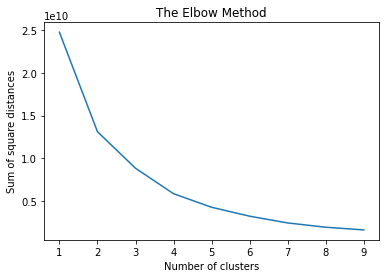

In [78]:
wss=[]
for i in range(1,10):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data)
  wss.append(kmeans.inertia_)

plt.plot(range(1,10), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square distances')
plt.show()

*Looking at the graf we nottice the elbow at the point where there is minimal change in the value of the sum of square M. In the case of our graf above it is 4* 
*Since the exact eblow is not clear enough we need a visualiser to determine which point to take* 
*We will then have to install the yellowbrick library to do this*

In [79]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
X = df[np.isfinite(df).all(1)]

In [83]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(data)
visualizer.show()

ValueError: ignored